# 2020.10.30作业

**本次作业使用PCA处理MNIST数据集。**

导入数据

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
trainData = pd.read_csv('trainDataSet.csv', index_col = 0)
testData = pd.read_csv('testDataSet.csv', index_col = 0)
'''
请下载数据到当前目录。
训练数据: 60000*785, 每一行数据中第一个维度为label，对应的数字标签，后面784维为图像数据，范围为0-1。
测试数据: 10000*785, 同上。
'''

'\n请下载数据到当前目录。\n训练数据: 60000*785, 每一行数据中第一个维度为label，对应的数字标签，后面784维为图像数据，范围为0-1。\n测试数据: 10000*785, 同上。\n'

**作业1.1 使用plt查看图像, 要求查看前12张训练数据的图像，请使用plt.imshow函数打印图像，图像reshape为(28, 28)。要求使用subplot(3, 4, i),其中i<12。**

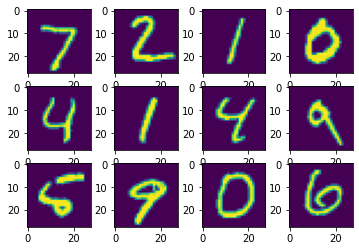

In [4]:
def reshapeImg(Data, ind):
    # ind: 序列，熟悉pandas，请提取出保存的image
    img=np.array(Data.iloc[ind]).reshape(28,28)
    return img # img.shape [28, 28]
    
for i in range(12):
    plt.subplot(3, 4, i+1)
    img = reshapeImg(testData, i)
    plt.imshow(img)

**作业1.2 标准化数据，保证每个维度的数据方差为1， 均值为0。**

In [5]:
trainImage = np.zeros((60000, 784))
testImage = np.zeros((10000, 784))
trainImage=np.array(trainData,dtype='float64')
testImage=np.array(testData,dtype='float64')
def transnorm(A,B):
    avg=A.mean(axis=0)
    dif=((A**2).mean(axis=0)-avg**2)**0.5
    dif[dif==0]=1
    A=(A-avg)/dif
    B=(B-avg)/dif
    return A,B
#备注:此处不除以标准差时,KNN分类效果更优
trainImage,testImage=transnorm(trainImage,testImage)
# plt.imshow(testImage[1].reshape(28,-1))
'''
标准化训练数据，使得训练数据的每个维度上方差为1，均值为0，即进行减均值并除以标准差的操作。
对测试数据按上述进行均值标准差进行标准化过程。
标准化的结果保存在trainImage和testImage中。
'''

'\n标准化训练数据，使得训练数据的每个维度上方差为1，均值为0，即进行减均值并除以标准差的操作。\n对测试数据按上述进行均值标准差进行标准化过程。\n标准化的结果保存在trainImage和testImage中。\n'

**作业1.3 计算样本的协方差矩阵，将特征值从大到小排列，保留其中的前50个特征值，打印前10大的特征值，并将原数据矩阵映射到新的降维后的矩阵中。**

In [6]:
dimension = 50
# trainImagePca = np.zeros((60000, dimension),dtype='float64')
# testImagePca = np.zeros((10000, dimension),dtype='float64')
def getpca(A,B):
    MA=A.T@A
    num,vec=np.linalg.eig(MA)
    sortn=num.argsort()[-1:-dimension-1:-1]
    num=num[sortn]
    vec=vec[:,sortn]
    print(num[:10])
    vec=vec/(vec**2).sum(axis=0)**0.5
    # print((vec*vec).sum(axis=0))
    return A@vec,B@vec
trainImagePca,testImagePca=getpca(trainImage,testImage)
# print(testImagePca.dtype)
# print(trainImagePca.dtype)
'''
降维后的新数据保存到trainImagePca和testImagePca中
'''

[2429217.6188729  1754472.60943942 1608681.45736857 1241176.40658207
 1084580.93075609  943974.93880614  827422.75500001  751042.82805901
  660396.70943725  603019.77263801]


'\n降维后的新数据保存到trainImagePca和testImagePca中\n'

**作业1.4 绘制特征值从大到小每一个特征维度的方差比例与累计方差比例。**

In [7]:
def getdif(A):
    return (A**2).mean(axis=0)-A.mean(axis=0)**2
    # return A
display(getdif(trainImagePca))
getdif(testImagePca)
# print(test)
# print(testImagePca.shape)

array([40.48696031, 29.24121016, 26.81135762, 20.68627344, 18.07634885,
       15.73291565, 13.79037925, 12.51738047, 11.00661182, 10.05032954,
        9.62029745,  8.63082971,  7.99146367,  7.8147519 ,  7.37541493,
        7.13046866,  6.71386812,  6.60389742,  6.4059417 ,  6.23727348,
        5.93219285,  5.76050254,  5.48394224,  5.31850857,  5.12864986,
        4.96054178,  4.90525486,  4.7083565 ,  4.52912211,  4.39463525,
        4.27515047,  4.2139267 ,  4.09831248,  4.03174418,  3.97706996,
        3.86045974,  3.80857673,  3.72557216,  3.6438747 ,  3.44163994,
        3.41618823,  3.36372921,  3.25768202,  3.23614929,  3.20472759,
        3.17905722,  3.14200491,  3.08583716,  3.06071455,  3.03754911])

array([40.93538228, 27.22685739, 27.35370382, 21.47764927, 18.31726703,
       15.56560572, 13.0136205 , 12.35568812, 10.86544692,  9.98301353,
        9.54222021,  8.31393789,  7.88129056,  7.85025903,  7.10696412,
        7.07643969,  6.27446327,  6.55526556,  6.09155174,  6.25625106,
        5.33295148,  5.64852108,  5.10086648,  5.27207073,  5.50318036,
        4.64011503,  4.77410145,  4.25629376,  4.35787786,  4.61179259,
        4.37386771,  4.23989548,  3.86056212,  4.31327777,  4.40907147,
        3.47582127,  3.69114553,  3.61817521,  3.77441129,  2.93781955,
        3.71923184,  3.37598657,  2.84885913,  2.37513851,  2.90168561,
        2.94054388,  2.95171099,  2.61659015,  3.28473925,  2.612313  ])

**作业1.5 加分题 使用KNN算法，对测试数据进行比较。knn（k-NearestNeighbor),即每个样本的类别都可以用它最接近的k个邻居来代表，在测试集上统计每一种数字的准确率和召回率。输出10行，每一行的格式为： 数字， 准确率， 召回率。准确率表示的是预测为该数字的样本中有多少是真正的该类样本，召回率表示某一类数字中有多少被分类正确。**

In [8]:
K=100
def predict(A,V,lbA):
    NV=((A-V)**2).sum(axis=1).argsort()[:K]
    return np.argmax(np.bincount(lbA[NV]))
labelTrain=np.array(trainData.index)
# for i in range(16):
#     plt.subplot(4,4,i+1)
#     plt.imshow(testImage[i].reshape(28,28))
#     print(predict(trainImagePca,testImagePca[i],labelTrain),labelTest[i])
labelTest=np.array(testData.index)
sumAnswer=np.zeros(10)
sumPredict=np.zeros(10)
sumCorrect=np.zeros(10)
for i,arr in enumerate(testImagePca):
    v=predict(trainImagePca,arr,labelTrain)
    ans=labelTest[i]
    sumPredict[v]+=1
    sumAnswer[ans]+=1
    if v==ans:
        sumCorrect[v]+=1
for i in range(10):
    print(i,'Precision',sumCorrect[i]/sumPredict[i],'Recall',sumCorrect[i]/sumAnswer[i])

0 Precision 0.9393346379647749 Recall 0.9795918367346939
1 Precision 0.9422594142259414 Recall 0.9920704845814978
2 Precision 0.956745623069001 Recall 0.9001937984496124
3 Precision 0.9265873015873016 Recall 0.9247524752475248
4 Precision 0.9422680412371134 Recall 0.9307535641547862
5 Precision 0.920045045045045 Recall 0.9159192825112108
6 Precision 0.953416149068323 Recall 0.9613778705636743
7 Precision 0.9312436804853387 Recall 0.8959143968871596
8 Precision 0.9201680672268907 Recall 0.8993839835728953
9 Precision 0.8854667949951877 Recall 0.9117938553022795


**作业1.6 有监督聚类，对测试数据使用PCA/LDA/TSNE中的一种或多种对数据降维到3维，绘制散点图，颜色区分label。并使用k-means进行进行聚类。绘制分类图。完成上述三种聚类的正确/错误率对比的柱状图显示，如下：
考虑到聚类的结果与原标准类并没有对应关系，因此需要先计算出一个聚类结果与标准结果直接的最大权匹配。然后才能得到实际每个类的正确/错误比例。**

[7. 3. 1. ... 4. 2. 6.]


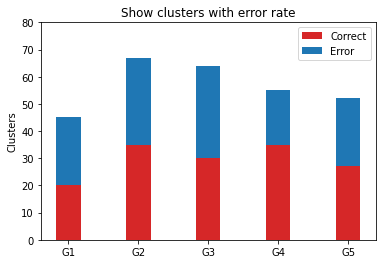

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,LatentDirichletAllocation
from sklearn.manifold import TSNE
def solvePca(A,dim):
    pca=PCA(n_components=dim)
    return pca.fit_transform(A)
def solveLda(A,dim):
    lda=LatentDirichletAllocation(n_components=dim)
    return lda.fit_transform(A)
def solveTsne(A,dim):
    B=solvePca(A,50)
    tsne=TSNE(n_components=dim)
    return tsne.fit_transform(B)
def cal(items,label):
    predict=KMeans(n_clusters=10).fit(items).labels_
    mat=np.zeros((10,10))
    realans=np.zeros(10)
    for i in range(len(label)):
        mat[predict[i]][label[i]]+=1
    for i in range(10):
        realans[i]=mat[i].argmax()
    return np.array(list(map(lambda x:realans[x],predict)))
def drawpoints(items,label):
    
def main():
    testImage=np.array(testData,dtype='float64')
    labelTest=np.array(testData.index)
    pca=solvePca(testImage,3)
    # lda=solveLda(testImage,3)
    # tsne=solveTsne(testImage,3)
    prePca=cal(pca,labelTest)
    print(prePca)
main()
#示例
N = 5
correctNum = (20, 35, 30, 35, 27)
errorNum = (25, 32, 34, 20, 25)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, correctNum, width, color='#d62728')
p2 = plt.bar(ind, errorNum, width,bottom=correctNum)

plt.ylabel('Clusters')
plt.title('Show clusters with error rate')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Correct', 'Error'))

plt.show()